In [1]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 

def show(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

# Select Shape Function 

1. Select width 
2. Select height
3. Select area 

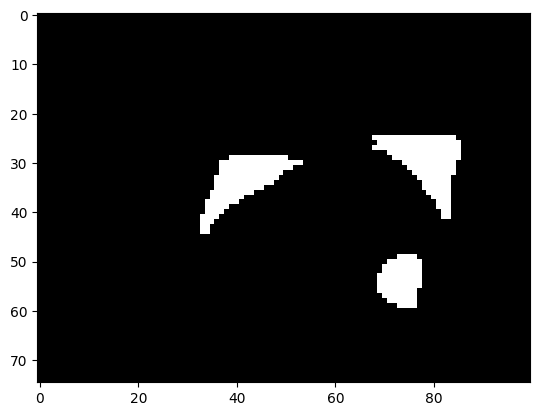

In [2]:
img  = cv2.imread("Images/mor3.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray,200, 255, cv2.THRESH_BINARY)

show(threshold)

In [3]:
number_object,labels , stats, center = cv2.connectedComponentsWithStats(threshold, 4, cv2.CV_32S)
number_object
print(stats)
list_width = list(stats[1: ,2])
print(list_width)
print(list_width[1])

[[   0    0  100   75 7137]
 [  68   25   18   17  149]
 [  33   29   21   16  135]
 [  69   49    9   11   79]]
[18, 21, 9]
21


In [4]:
def Select_Shape(threshold,min_value, max_value, feature = "width"): 
    
    number_object,labels , stats, center = cv2.connectedComponentsWithStats(threshold, 4, cv2.CV_32S)
    
    list_width = list(stats[1: ,2])
    list_height = list(stats[1: ,3])
    list_area = list(stats[1: ,4])
    
    #
    result = np.zeros((threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
    
    # 
    list_output_width = []
    list_output_height = []
    list_output_area =[]
    #
    list_region  = []
    # ----------------------------------------------------- WIDTH
    if feature == "width":
        for idx in range(1,number_object):
            width  = list_width[idx -1]
            height = list_height[idx -1]
            area   = list_area[idx -1]
            
            if width > min_value  and width < max_value:
                select_object = np.zeros( (threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
                
                select_object[labels == idx] = 255
                select_object[labels != idx] = 0
                
                list_region.append(select_object)
                result = cv2.bitwise_or(result,select_object)
                list_output_width.append(width)
                
                list_output_height.append(height)
                list_output_area.append(area)
                
        return result,list_region,list_output_width,list_output_height , list_output_area
    
    # ----------------------------------------------------- HEIGHT 
    elif feature == "height":
        for idx in range(1,number_object):
            width  = list_width[idx -1]
            height = list_height[idx -1]
            area   = list_area[idx -1]
            
            if height > min_value  and height < max_value:
                select_object = np.zeros( (threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
                
                select_object[labels == idx] = 255
                select_object[labels != idx] = 0
                
                list_region.append(select_object)
                
                result = cv2.bitwise_or(result,select_object)
                list_output_width.append(width)
                
                list_output_height.append(height)
                list_output_area.append(area)
                
        return result,list_region,list_output_width,list_output_height , list_output_area              
    
    
    # ----------------------------------------------------- AREA
    elif feature == "area":
        for idx in range(1,number_object):
            width  = list_width[idx -1]
            height = list_height[idx -1]
            area   = list_area[idx -1]
            
            if area > min_value  and area < max_value:
                
                select_object = np.zeros( (threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
                
                select_object[labels == idx] = 255
                select_object[labels != idx] = 0
                
                list_region.append(select_object)
                
                result = cv2.bitwise_or(result,select_object)
                list_output_width.append(width)
                
                list_output_height.append(height)
                list_output_area.append(area)
                
        return result,list_region,list_output_width,list_output_height , list_output_area
    
    # ----------------------------------------------------- Circularity 
    # ----------------------------------------------------- Squaredness 

    

[18, 21, 9]
[17, 16, 11]
[149, 135, 79]


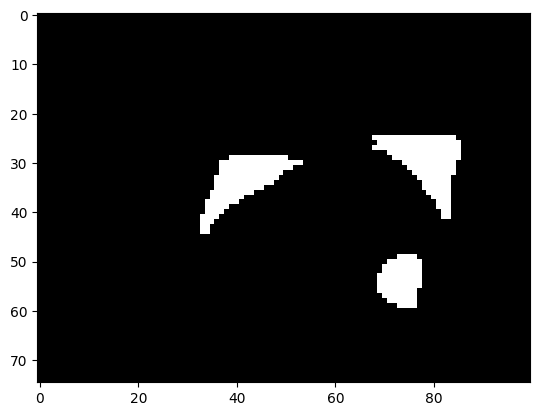

In [12]:
result,list_region,list_output_width,list_output_height , list_output_area = Select_Shape(threshold,10, 60, feature="height")

show(result), 
print(list_output_width)
print(list_output_height)
print(list_output_area)

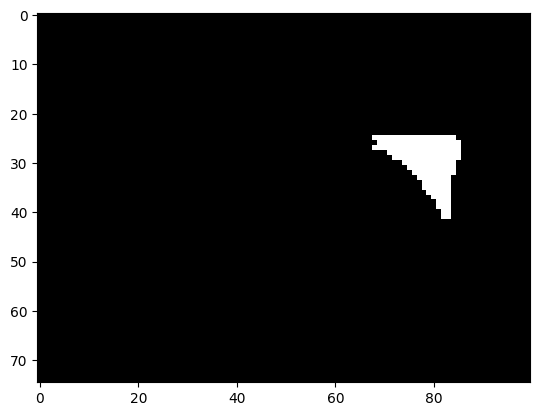

In [13]:
show(list_region[0])

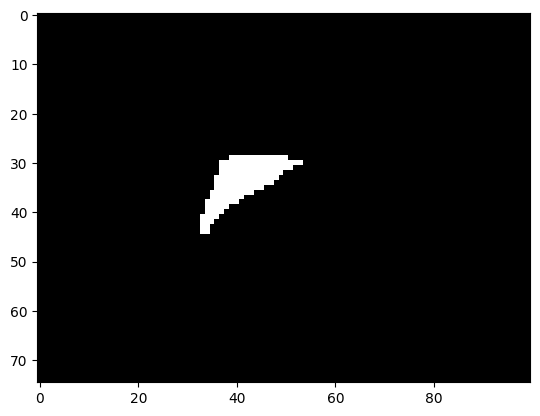

In [14]:
show(list_region[1])

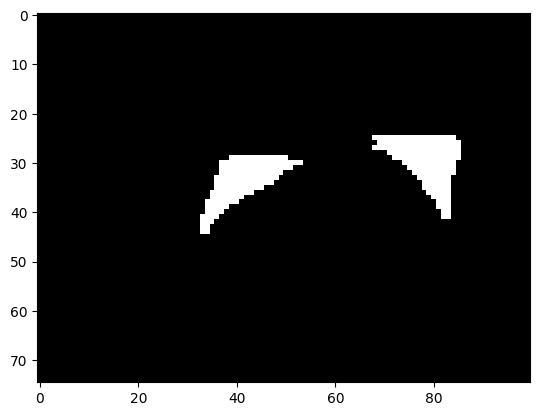

In [15]:
bit_or = cv2.bitwise_or(list_region[0], list_region[1])
show(bit_or)

# Fill Up 

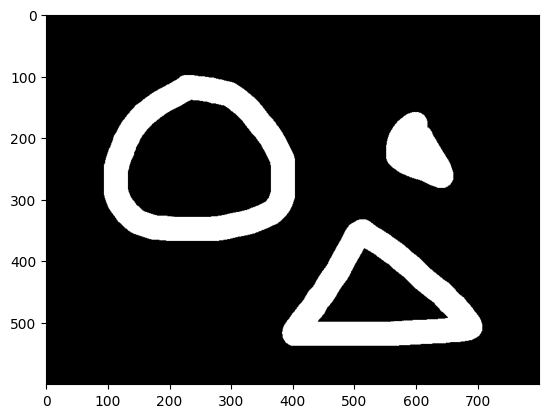

In [16]:
img = cv2.imread("images/shape.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
show(threshold)

## Set

In [ ]:
set_a =set()

## add data to set

In [ ]:
set_a.add((100,200))

In [ ]:
set_a.add((100,201))

In [ ]:
set_a.add((100,200))

In [ ]:
set_a

{(100, 200), (100, 201)}

In [ ]:
def flood_fill(threshold, start_point =(0,0), new_color = 255):
    
    height, width = threshold.shape[0], threshold.shape[1]
    
    point_visited = set() # Danh dau cac diem da di qua,
    
    stack_point = [start_point] # cac diem hang xom cua pixel dang xet
    
    while stack_point:
        x,y  = stack_point.pop() # add (push)
        point_visited.add((x,y))
        
        threshold[x, y] = new_color
        
        # Mode 4 pixel hang xom xung quanh pixel (y,x)
        list_neighbor = [(x-1, y) ,(x+1,y), (x, y-1) , (x, y+1)] # list (tuple, tuple, tuple, tuple )
        
        for point_nb in list_neighbor:
            p_x,p_y  = point_nb
            
            if 0 <= p_x < height and 0<= p_y <width  and (p_x, p_y) not in point_visited and threshold[p_x, p_y]!= new_color:
                stack_point.append((p_x, p_y))      
                        

In [ ]:
threshold_copy = threshold.copy()
flood_fill(threshold_copy, (0,0), 255)

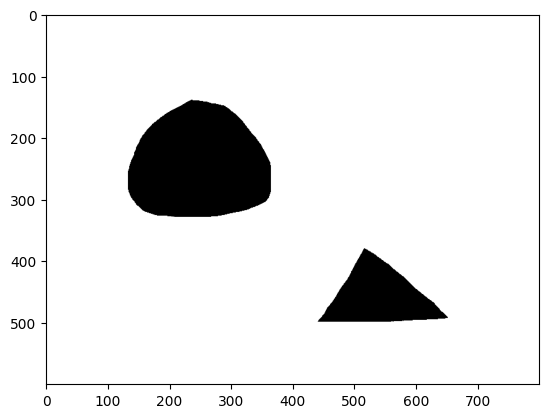

In [ ]:
show(threshold_copy)

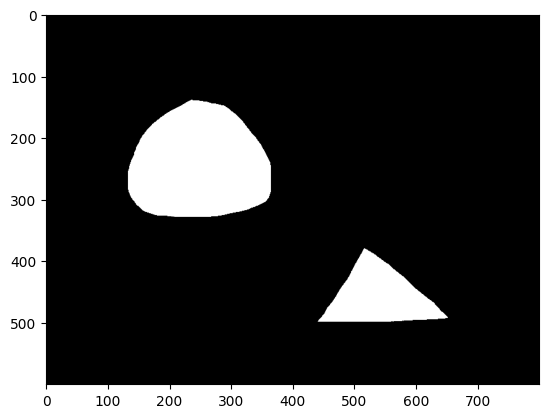

In [ ]:
fill_region = cv2.bitwise_not(threshold_copy)
show(fill_region)

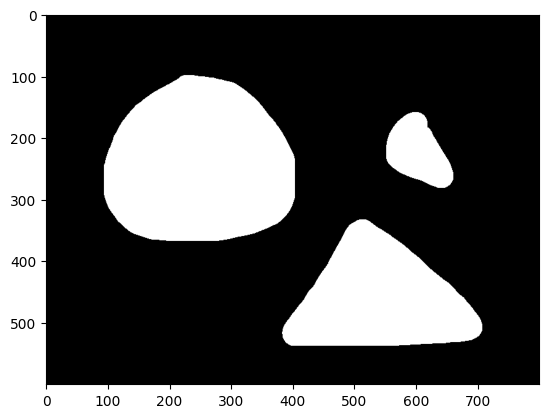

In [ ]:
fill_up = cv2.bitwise_or(fill_region,threshold)
show(fill_up)

# Opencv

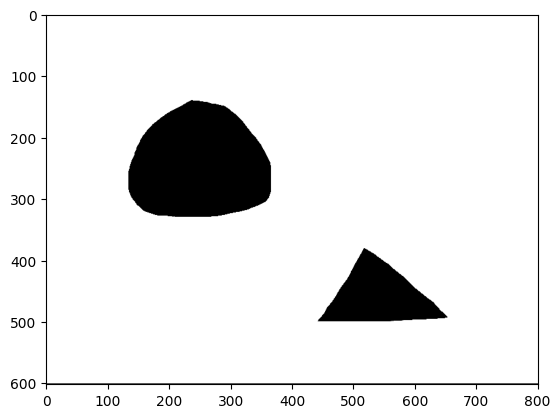

In [ ]:

show(img_fill)

In [ ]:
threshold.shape

(600, 800)

# Opencv

In [20]:
threshold =threshold.astype(np.uint8)

img_fill = cv2.copyMakeBorder(threshold, 1,1,1,1, cv2.BORDER_CONSTANT, 0)

height , width = threshold.shape[0], threshold.shape[1]


mask = np.zeros((height+4 , width +4), dtype = np.uint8)

cv2.floodFill(img_fill , mask, (0,0), 255, flags = 4)


(366402,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 (0, 0, 802, 602))

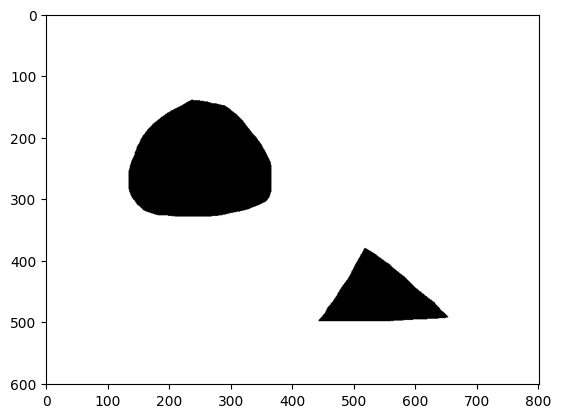

In [21]:
fill_image = img_fill[1:]
fill_image.shape
show(fill_image)

In [ ]:
threshold.shape

(600, 800)

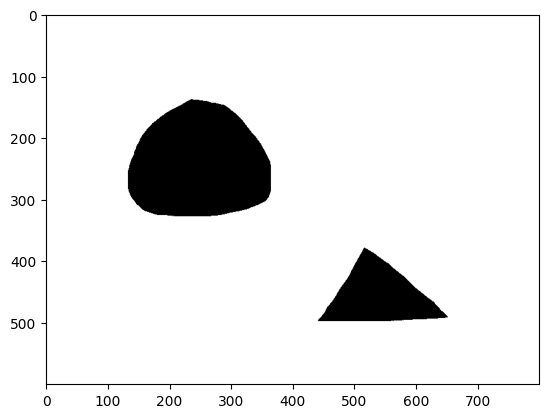

In [22]:
result = np.zeros((threshold.shape), np.uint8)
result[:,:] = fill_image[1:601, 1:801]

show(result)

In [23]:
inv = cv2.bitwise_not(result)
fill_up = cv2.bitwise_or(inv, threshold)

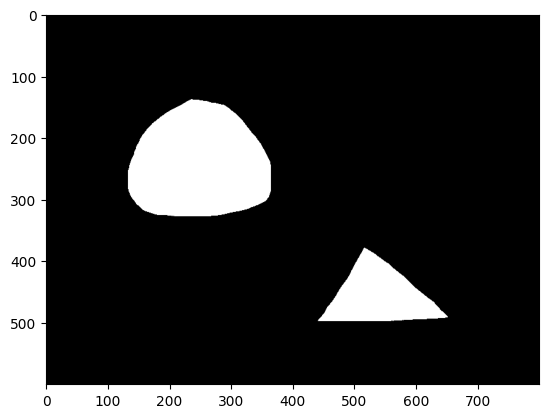

In [ ]:
show(inv)

## FillUp Function

In [17]:
def FillUp(region):
    region =region.astype(np.uint8)
    # add padding
    im_floodfill = cv2.copyMakeBorder(region, 1, 1, 1, 1, cv2.BORDER_CONSTANT, 0)

    # Create mask (ROI)
    h, w = im_floodfill.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    cv2.floodFill(im_floodfill, mask, (0,0), 255, flags = 4)
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)
    im_floodfill_inv = im_floodfill_inv[1:(1 + region.shape[0]), 1:(1 + region.shape[1])]

    RegionFillUp = region | im_floodfill_inv
    return RegionFillUp

In [18]:
threshold_copy = threshold.copy()
RegionFillUp = FillUp(threshold_copy)

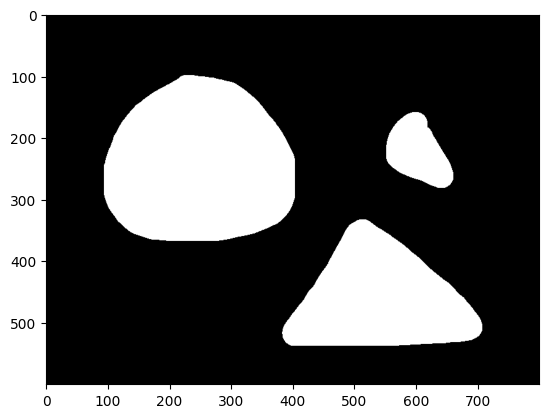

In [19]:
show(RegionFillUp)

# Count Hole

In [28]:
def countHole(region):
    region =region.astype(np.uint8)
    # add padding
    im_floodfill = cv2.copyMakeBorder(region, 1, 1, 1, 1, cv2.BORDER_CONSTANT, 0)

    # Create mask (ROI)
    h, w = im_floodfill.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    cv2.floodFill(im_floodfill, mask, (0,0), 255, flags = 4)
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)
    
    # Count Hole 
    num_object, _ = cv2.connectedComponents(im_floodfill_inv)   # khong tra ve gia tri left, top, width, height, area
                                                                # Chi tra ve num_hole, labels 
    num_hole = num_object -1 
    return num_hole

In [30]:
num_hole = countHole(threshold)
num_hole

2